# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: World Data

## Import Data

In [20]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD
from datetime import timedelta, date, datetime
from urllib.request import urlopen
import json
import plotly.express as px

In [21]:
# import time_series_covid19_confirmed_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)

In [22]:
# import time_series_covid19_deaths_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = pd.read_csv(url, error_bad_lines=False)

In [23]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,5
252,NaN,MS Zaandam,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2


In [24]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,1,1,1,2,4,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,4,5,5,6,8,10,10,11
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,15,17,17,19,21,25,26,29,31,35
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,1,1,1,1,3,3,3,6,8
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,NaN,MS Zaandam,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


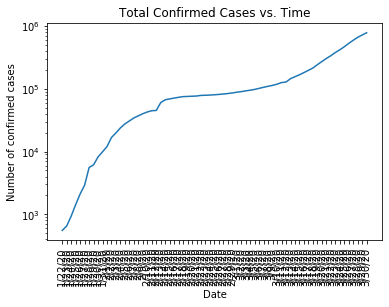

In [25]:
# plot confirmed cases vs. time
plt.title('Total Confirmed Cases vs. Time')

plt.plot(confirmed.loc[:,'1/22/20':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

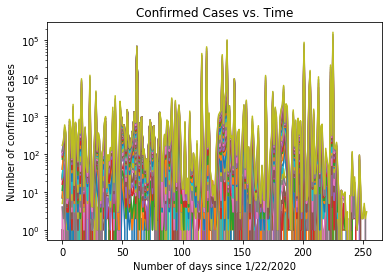

In [26]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(confirmed.loc[:,'1/22/20':])

plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')

plt.show()

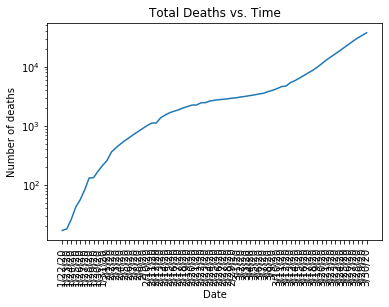

In [27]:
# plot confirmed cases vs. time
plt.title('Total Deaths vs. Time')

plt.plot(deaths.loc[:,'1/22/20':].sum())

plt.xlabel('Date')
plt.ylabel('Number of deaths')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

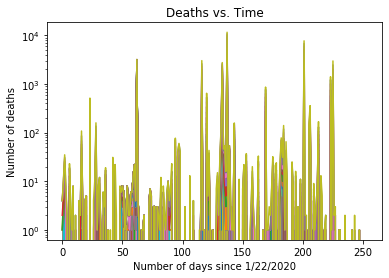

In [28]:
# plot confirmed cases vs. time
plt.title('Deaths vs. Time')

plt.plot(deaths.loc[ :,'1/22/20':])

plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Number of deaths')
plt.yscale('log')

plt.show()

## Normalize each location’s time series to account for larger population centers

subtract mean from time series and set variance to one

In [29]:
idx = pd.IndexSlice

# confirmed cases normalized
data = confirmed.loc[ :,'1/22/20':] # select all date ranges
scaledDataConfirmed = preprocessing.scale(data) # Scaled data has zero mean and unit variance
#confirmed.loc[ idx[:,'1/22/20':]] = scaledDataConfirmed

# deaths normalized
data = deaths.loc[ :,'1/22/20':] # select all date ranges
scaledDataDeaths = preprocessing.scale(data) # Scaled data has zero mean and unit variance
#deaths.loc[ idx[:,'1/22/20':]] = scaledDataDeaths

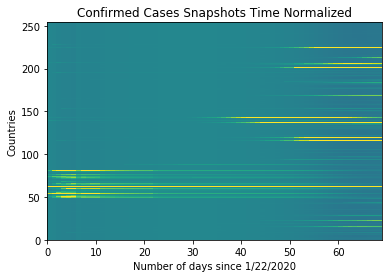

In [30]:
# plot normalized data snapshots
plt.title('Confirmed Cases Snapshots Time Normalized')
plt.pcolor(scaledDataConfirmed, vmin=-1, vmax=1)
plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Countries')
plt.show()

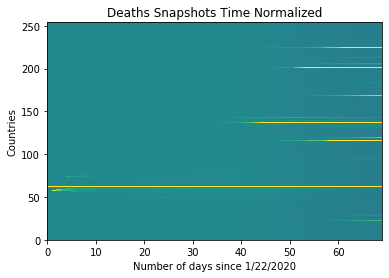

In [31]:
plt.title('Deaths Snapshots Time Normalized')

plt.pcolor(scaledDataDeaths, vmin=-1, vmax=1)
plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Countries')
plt.show()

## Take DMD

In [32]:
dmd = DMD()
dmd.fit(scaledDataConfirmed.T)


Eigenvalue (0.5905054587045359+0.10017005612338303j): distance from unit circle 0.641269263096384
Eigenvalue (0.5905054587045359-0.10017005612338303j): distance from unit circle 0.641269263096384
Eigenvalue (0.16718523763971826+0.4893772916070613j): distance from unit circle 0.7325589627746882
Eigenvalue (0.16718523763971826-0.4893772916070613j): distance from unit circle 0.7325589627746882
Eigenvalue (-0.4950167877151689+0.1949223891979973j): distance from unit circle 0.7169636420694999
Eigenvalue (-0.4950167877151689-0.1949223891979973j): distance from unit circle 0.7169636420694999
Eigenvalue (0.021587013377282624+0.3250685001744404j): distance from unit circle 0.8938644710477889
Eigenvalue (0.021587013377282624-0.3250685001744404j): distance from unit circle 0.8938644710477889
Eigenvalue (0.24156166570413387+0j): distance from unit circle 0.9416479616622443
Eigenvalue (-0.11772885286188367+0.2134397083985181j): distance from unit circle 0.9405834080825805
Eigenvalue (-0.11772885286

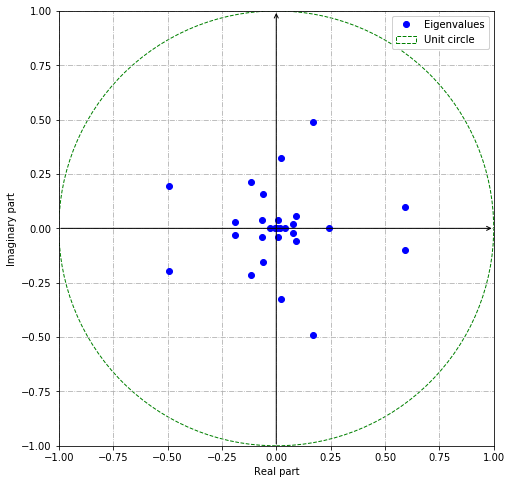

In [33]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

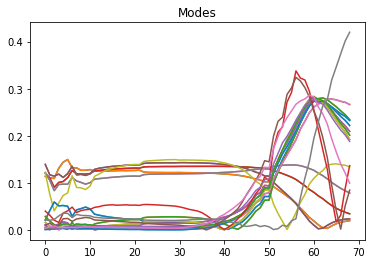

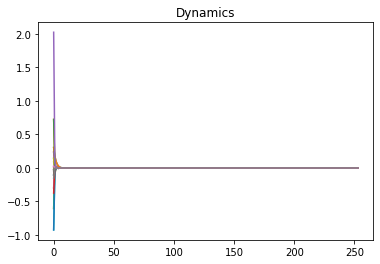

In [38]:
# modes for each date and country
for mode in dmd.modes.T:
    plt.plot(abs(mode.real))
    plt.title('Modes')
plt.show()


for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
plt.show()


In [48]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
df = confirmed
fig = px.choropleth(df,    locations='Country/Region',  
                           color=dynamic.real,
                           range_color=(0, 1),
                           scope="world",
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()